<a href="https://colab.research.google.com/github/StephenLeonardo/InfoRetrieval/blob/main/Project_IR_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# INI UNTUK MENGGABUNGKAN True.csv dan Fake.csv
# Saya comment karna sudah pernah dijalankan dan meng-export file baru 'dataset.csv' yang merupakan gabungan dari True.csv dan Fake.csv

# import numpy as np
# import pandas as pd

# from google.colab import drive
# drive.mount('/content/drive')

# truth = pd.read_csv("drive/MyDrive/IR_Project/True.csv")
# fake = pd.read_csv("drive/MyDrive/IR_Project/Fake.csv")

# truth_filtered = truth[['title']].copy()
# truth_filtered.head()

# fake_filtered = fake[['title']].copy()
# fake_filtered.head()

# truth_filtered['label'] = 1
# truth_filtered.head()

# fake_filtered['label'] = 0
# fake_filtered.head()

# dataset = truth_filtered.append(fake_filtered).sample(frac=1, random_state=1)
# dataset.head()

# dataset.to_csv('drive/MyDrive/IR_Project/dataset.csv', index=False)

In [ ]:
!pip install transformers

     |████████████████████████████████| 1.5MB 8.9MB/s 
     |████████████████████████████████| 890kB 23.5MB/s 
     |████████████████████████████████| 2.9MB 40.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=06bd1689419489542649edcccdae62fd99b6e96a8d9a9543c8fba658eb69abd4
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
import transformers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('drive/MyDrive/IR_Project/dataset.csv')
dataset.head()

,title,label
0,EPA chief says Paris climate agreement 'bad de...,1
1,BREAKING NEWS: President Trump Announces Major...,0
2,Trump says New Hampshire win not necessary to ...,1
3,Kremlin: U.S. sanctions aimed at turning busin...,1
4,MUST WATCH: Kellyanne Conway PUNCHES BACK Afte...,0


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Kita visualisasikan kata-kata yang berada pada label Fake (0)

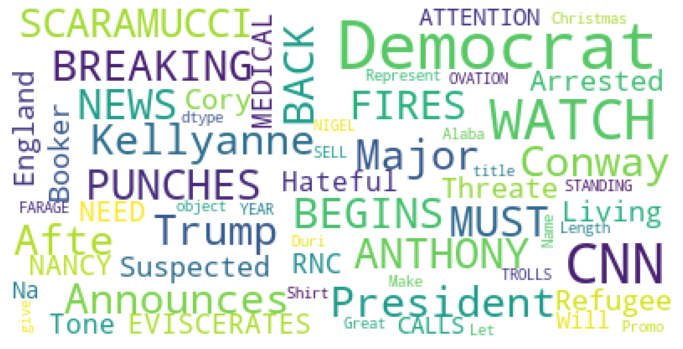

In [ ]:
stopwords = set(STOPWORDS) 

text = str(dataset.loc[dataset['label'] == 0]['title'])

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=40, 
                          random_state=42
                         ).generate(text)

plt.figure(figsize=(12, 16))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Kita visualisasikan kata-kata yang berada pada label Truth (1)

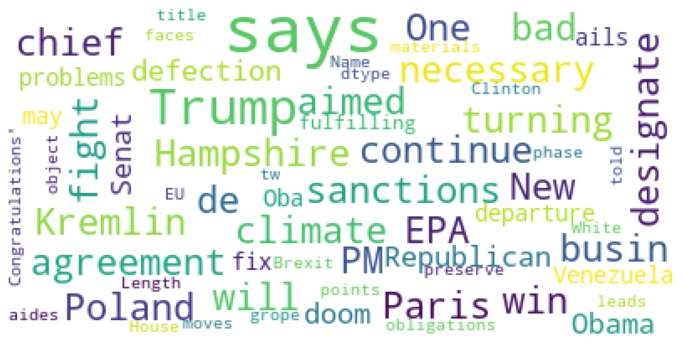

In [ ]:
stopwords = set(STOPWORDS) 

text = str(dataset.loc[dataset['label'] == 1]['title'])

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=40, 
                          random_state=42
                         ).generate(text)

plt.figure(figsize=(12, 16))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(dataset['title'])):
  review = re.sub('[^a-zA-Z]', ' ', dataset['title'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
np.array(corpus).shape

(44898,)

In [ ]:
!pip install sentence-transformers

     |████████████████████████████████| 71kB 4.8MB/s 
     |████████████████████████████████| 1.1MB 10.9MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.4.0-cp36-none-any.whl size=102655 sha256=75b860cb2c698369bb4cc5400334ed93ea3cfd7646889725007ab50ec92ab43c
  Stored in directory: /root/.cache/pip/wheels/ff/76/65/50258d8b7930e909ea2f5bd006a23d520a16765af13ab45bb3
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

100%|██████████| 405M/405M [00:22<00:00, 17.9MB/s]


In [ ]:
sentence_embeddings = sbert_model.encode(corpus, convert_to_tensor=True)

In [ ]:
X = sentence_embeddings
y = np.array(dataset['label'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(768, 384) 
        self.layer_2 = nn.Linear(384, 192)
        self.layer_3 = nn.Linear(192, 96)
        self.layer_4 = nn.Linear(96, 96)
        self.layer_out = nn.Linear(96, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(384)
        self.batchnorm2 = nn.BatchNorm1d(192)
        self.batchnorm3 = nn.BatchNorm1d(96)
        self.batchnorm4 = nn.BatchNorm1d(96)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.relu(self.layer_3(x))
        x = self.batchnorm3(x)
        x = self.relu(self.layer_4(x))
        x = self.batchnorm4(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
model = Net()
model.to(device)

Net(
  (layer_1): Linear(in_features=768, out_features=384, bias=True)
  (layer_2): Linear(in_features=384, out_features=192, bias=True)
  (layer_3): Linear(in_features=192, out_features=96, bias=True)
  (layer_4): Linear(in_features=96, out_features=96, bias=True)
  (layer_out): Linear(in_features=96, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm4): BatchNorm1d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [ ]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [ ]:
model.train()
epoch_loss = 0
epoch_acc = 0
for e in range(1, 20 + 1):

    X_batch = X_train.to(device)
    y_batch = torch.from_numpy(y_train).to(device)
    optimizer.zero_grad()

    y_pred = model(X_batch)
      
    loss = criterion(y_pred, y_batch.unsqueeze(1).float())
    acc = binary_acc(y_pred, y_batch.unsqueeze(1).float())
    
    loss.backward()
    optimizer.step()
    
    epoch_loss += loss.item()
    epoch_acc += acc.item()
      
    print(f'Epoch {e+0:03}: | Loss: {loss.item():.5f} | Acc: {acc.item():.3f}')

Epoch 001: | Loss: 0.78212 | Acc: 42.000
Epoch 002: | Loss: 0.50537 | Acc: 79.000
Epoch 003: | Loss: 0.42804 | Acc: 83.000
Epoch 004: | Loss: 0.37720 | Acc: 85.000
Epoch 005: | Loss: 0.34496 | Acc: 86.000
Epoch 006: | Loss: 0.32089 | Acc: 87.000
Epoch 007: | Loss: 0.30282 | Acc: 87.000
Epoch 008: | Loss: 0.28889 | Acc: 88.000
Epoch 009: | Loss: 0.27734 | Acc: 88.000
Epoch 010: | Loss: 0.26733 | Acc: 89.000
Epoch 011: | Loss: 0.25903 | Acc: 89.000
Epoch 012: | Loss: 0.24967 | Acc: 90.000
Epoch 013: | Loss: 0.24068 | Acc: 90.000
Epoch 014: | Loss: 0.23157 | Acc: 90.000
Epoch 015: | Loss: 0.22257 | Acc: 91.000
Epoch 016: | Loss: 0.21407 | Acc: 91.000
Epoch 017: | Loss: 0.20643 | Acc: 92.000
Epoch 018: | Loss: 0.19832 | Acc: 92.000
Epoch 019: | Loss: 0.19088 | Acc: 92.000
Epoch 020: | Loss: 0.18375 | Acc: 93.000


In [ ]:
y_pred_list = None
model.eval()
with torch.no_grad():
    X_batch = X_test.to(device)
    y_test_pred = model(X_batch)
    y_test_pred = torch.sigmoid(y_test_pred)
    y_pred_list = torch.round(y_test_pred).cpu().numpy()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred_list))
print(classification_report(y_test, y_pred_list))

[[4253  427]
 [ 495 3805]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      4680
           1       0.90      0.88      0.89      4300

    accuracy                           0.90      8980
   macro avg       0.90      0.90      0.90      8980
weighted avg       0.90      0.90      0.90      8980



In [ ]:
user_input = input("input news title: ")
print("You inputted: {}".format(user_input))

input news title: Coronavirus Bioweapon – How China Stole Coronavirus From Canada And Weaponized It
You inputted: Coronavirus Bioweapon – How China Stole Coronavirus From Canada And Weaponized It


In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
user_input_corpus = []

user_input = re.sub('[^a-zA-Z]', ' ', user_input)
review = review.lower()
review = review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
review = ' '.join(review)
user_input_corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
user_input_corpus = sbert_model.encode(user_input_corpus, convert_to_tensor=True)

In [ ]:
user_input_test_pred = None
with torch.no_grad():
    X_batch = user_input_corpus.to(device)
    user_input_test_pred = model(X_batch)
    user_input_test_pred = torch.sigmoid(user_input_test_pred)
    user_input_test_pred = torch.round(user_input_test_pred).cpu().numpy()

In [ ]:
print("The title '{}' is classified as a {} news!".format(user_input,'fake' if np.squeeze(user_input_test_pred) == 0 else 'real'))

The title 'Coronavirus Bioweapon   How China Stole Coronavirus From Canada And Weaponized It' is classified as a fake news!
